In [1]:
import rasterio
from rasterio.profiles import DefaultGTiffProfile
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted
import numpy as np
from pathlib import PosixPath
from tqdm.autonotebook import tqdm

/opt/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


This notebook calculates the mean images for the various input datasets from SEN1_2MS:

* Sentinel 1 (horizontal and vertical polarisation) [dB]
* Sentinel 2 (multispectral, 13 bands), 12-bit quantised ints

In [2]:
sar_images = natsorted(glob("/mnt/data/ROIs*_*/s1*/*.tif"))

In [3]:
optical_images = natsorted(glob("/mnt/data/ROIs*_*/s2*/*.tif"))

In [4]:
landcover_images = natsorted(glob("/mnt/data/ROIs*_*/l*/*.tif"))

In [63]:
total_vv_image = np.zeros((256, 256), dtype='float64')

for i, image in enumerate(tqdm(sar_images)):
    total_vv_image += np.nan_to_num(rasterio.open(image).read(1))
    
total_vv_image /= len(sar_images)

In [77]:
np.save("/mnt/data/total_vv_image", total_vv_image)

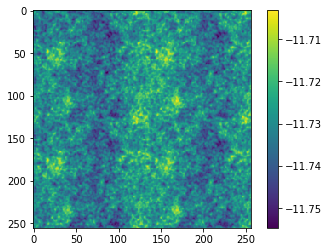

In [78]:
plt.imshow(total_vv_image)
plt.colorbar()

In [ ]:
total_vh_image = np.zeros((256, 256), dtype='float64')

for i, image in enumerate(tqdm(sar_images)):
    total_vh_image += np.nan_to_num(rasterio.open(image).read(2))
    
total_vh_image /= len(sar_images)

In [76]:
np.save("/mnt/data/total_vh_image", total_vh_image)

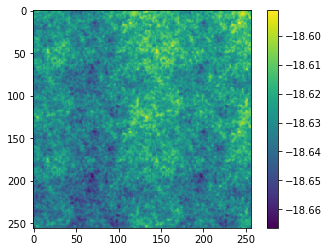

In [75]:
plt.imshow(total_vh_image)
plt.colorbar()

In [80]:
example_image = rasterio.open(optical_images[0]).read()
total_optical_image = np.zeros_like(example_image, dtype='float64')

for i, image in enumerate(tqdm(optical_images)):
    total_optical_image += np.nan_to_num(rasterio.open(image).read())
    
total_optical_image /= len(optical_images)

In [81]:
np.save("/mnt/data/total_optical_image", total_optical_image)

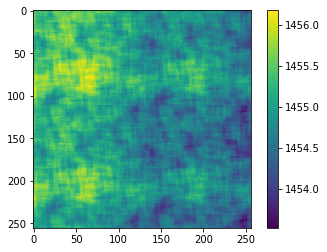

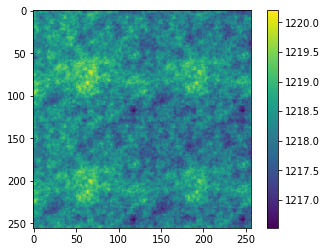

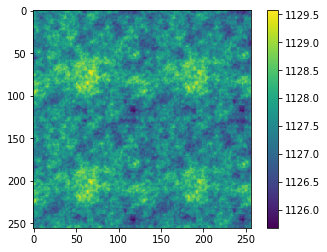

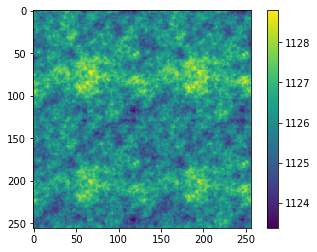

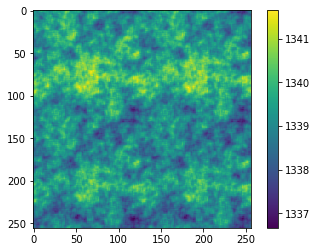

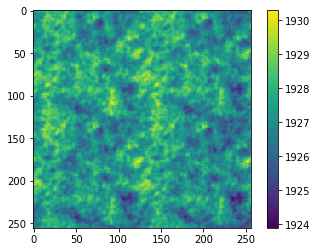

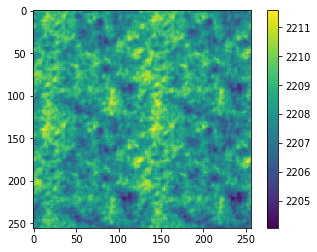

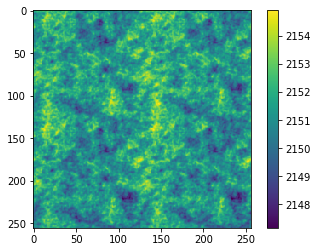

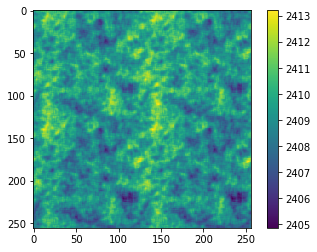

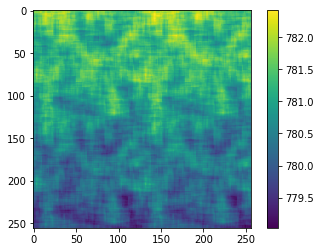

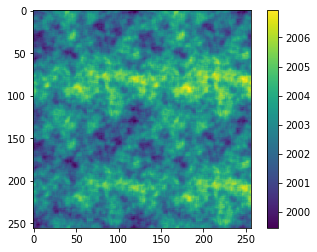

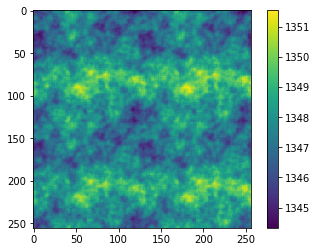

In [82]:
for i in range(13):
    plt.imshow(total_optical_image.transpose((1,2,0))[:,:,i])
    plt.colorbar()
    plt.show()

In [5]:
import random

In [53]:
def get_sample(n, images, channel):
    return np.array([np.nan_to_num(rasterio.open(image).read(channel)) for image in random.sample(images, n)])

In [60]:
optical_stats = []
for i in range(13):
    sample = get_sample(1000, optical_images, i+1)
    optical_stats.append((sample.mean(), sample.std()))
optical_stats = np.array(optical_stats)

In [ ]:
print(optical_stats[:,1])

In [62]:
print(optical_stats[:,1])

[ 715.05634143  635.77375537  813.78926272 1010.01568562 1029.50083832
  954.77960049 1069.46720883 1111.70066988 1125.21325731  475.52284189
   28.11725417 1083.49754038  937.81540195]


In [29]:
ns = np.linspace(1,1000).astype('int')

In [30]:
stats = []

for n in ns:
    sample = get_sample(n)
    stats.append( (sample.mean(), sample.std()) )
    
    print(n, stats[-1])

1 (-8.268936, 4.3563137)
21 (-12.673928, 6.2198257)
41 (-12.206951, 4.444482)
62 (-12.334347, 4.584606)
82 (-11.982651, 4.366831)
102 (-12.302659, 5.0510006)
123 (-11.727359, 4.454606)
143 (-12.552308, 5.0173717)
164 (-11.600058, 4.2219777)
184 (-11.335571, 4.20625)
204 (-11.689214, 4.422561)
225 (-11.747358, 4.7362175)
245 (-11.754979, 4.527095)
266 (-11.531599, 4.6038785)
286 (-11.458152, 4.3777742)
306 (-11.403755, 4.450933)
327 (-11.928807, 4.6718097)
347 (-11.478467, 4.4134364)
367 (-11.822024, 4.8499436)
388 (-11.56487, 4.6922154)
408 (-11.701279, 4.5086102)
429 (-11.774166, 4.6562614)
449 (-11.717767, 4.409875)
469 (-11.694686, 4.3402505)
490 (-11.685129, 4.7410455)
510 (-11.917103, 4.729083)
531 (-11.749988, 4.4698296)
551 (-11.640344, 4.45381)
571 (-11.613182, 4.411181)
592 (-11.736044, 4.3856936)
612 (-11.702691, 4.5307407)
633 (-11.588397, 4.5628405)


KeyboardInterrupt: 

In [31]:
stats = np.array(stats)

Text(0.5, 0, 'Sample size')

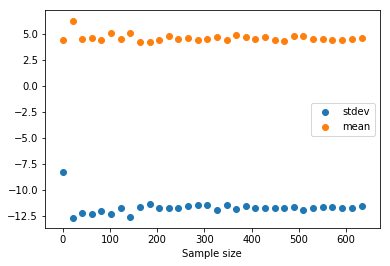

In [40]:
plt.scatter(ns[:len(stats)], stats[:,0], label='stdev')
plt.scatter(ns[:len(stats)], stats[:,1], label='mean')
plt.legend()
plt.xlabel("Sample size")